In [1]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

# Load asymmetry data
with open('raw_data/asymmetry.json', 'r') as infile:
    asymmetry_data = json.load(infile)

# Load diagnostic data
with open('raw_data/diagnostic.json', 'r') as infile:
    diagnostic_data = json.load(infile)

# Dictionary for processed data
processed_asymmetry_data = {}

# Calculate mean and standard deviation of asymmetries for each image
for image_path, asymmetries in asymmetry_data.items():
    all_asymmetries = [value for rotation in asymmetries.values() for value in rotation]
    mean_asymmetry = np.mean(all_asymmetries)
    std_asymmetry = np.std(all_asymmetries)
    # Add diagnostic info to the processed data
    diagnostic = diagnostic_data.get(image_path, 'Unknown')  # Default to 'Unknown' if not found
    processed_asymmetry_data[image_path] = {'mean': mean_asymmetry, 'std': std_asymmetry, 'diagnostic': diagnostic}

# Save processed results
os.makedirs('processed_data', exist_ok=True)
with open('processed_data/asymmetry.json', 'w') as outfile:
    json.dump(processed_asymmetry_data, outfile, indent=4)

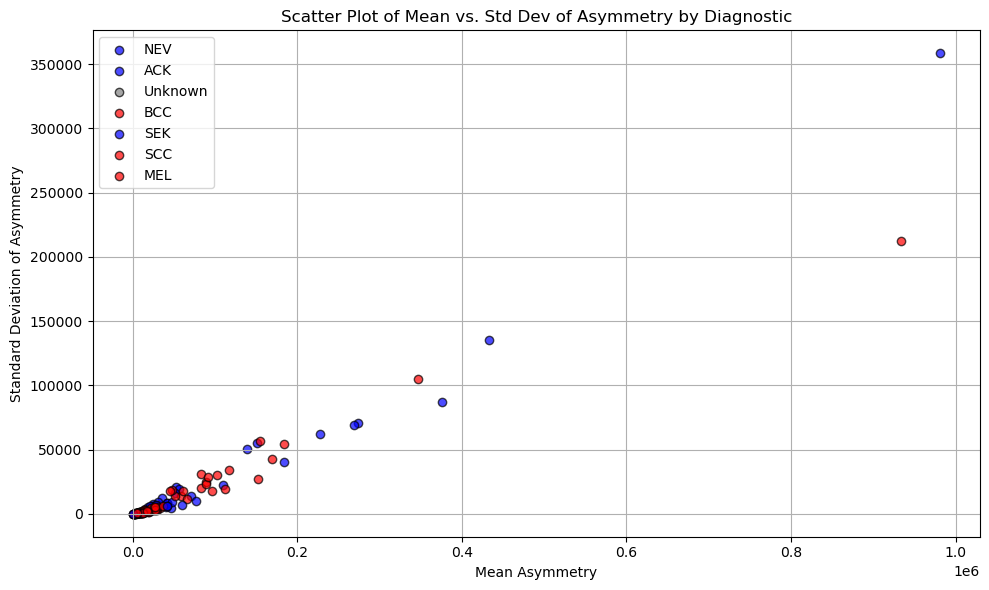

In [6]:
# Plotting
colors = {
    'BCC': 'red',
    'MEL': 'red',
    'SCC': 'red',
    'ACK': 'blue',
    'NEV': 'blue',
    'SEK': 'blue',
    'Unknown': 'gray'  # For any unspecified diagnostics
}

fig, ax = plt.figure(figsize=(10, 6)), plt.axes()
for image_path, details in processed_asymmetry_data.items():
    ax.scatter(details['mean'], details['std'], alpha=0.7, 
               color=colors[details['diagnostic']], 
               label=details['diagnostic'], edgecolors='black')

# To avoid duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Mean Asymmetry')
plt.ylabel('Standard Deviation of Asymmetry')
plt.title('Scatter Plot of Mean vs. Std Dev of Asymmetry by Diagnostic')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
images_above_threshold = []
threshold = 0.4E6  # 400,000

# Check each image for its mean asymmetry
for image_path, stats in processed_asymmetry_data.items():
    if stats['mean'] > threshold:
        images_above_threshold.append(image_path)
        images_above_threshold.append(image_path)

# Print the list of images
print("Images with mean asymmetry above 400,000:")
for image in images_above_threshold:
    print(image)


Images with mean asymmetry above 400,000:
group_A_masks/masks/mask2/PAT_1725_3222_943_mask.png
group_A_masks/masks/mask2/PAT_1725_3222_943_mask.png
group_A_masks/masks/mask3/PAT_241_367_89_mask.png
group_A_masks/masks/mask3/PAT_241_367_89_mask.png
group_A_masks/masks/mask4/PAT_645_4043_374_mask.png
group_A_masks/masks/mask4/PAT_645_4043_374_mask.png


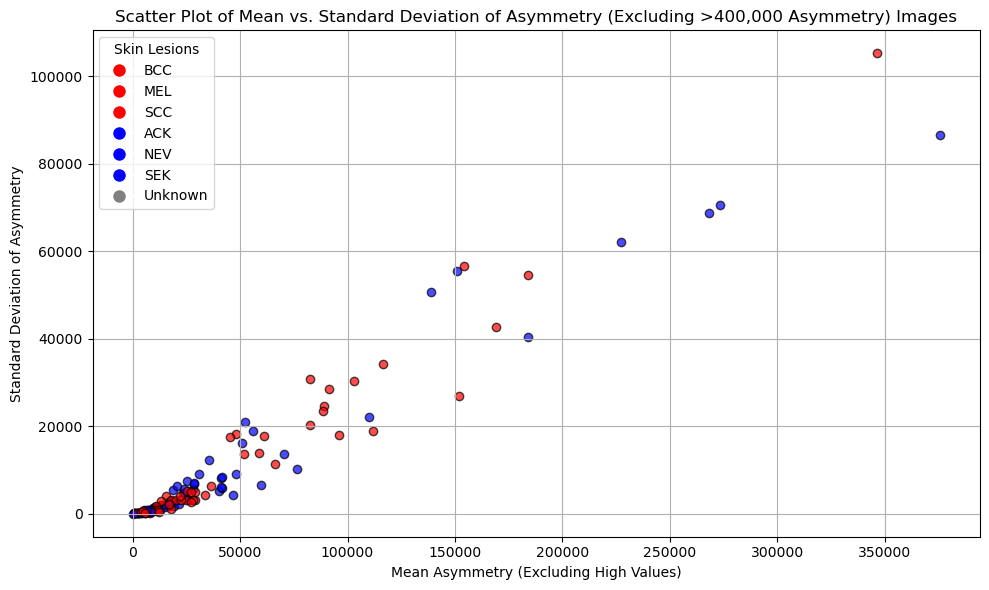

In [9]:
# Initialize lists for filtered data including diagnostic for color mapping
filtered_means = []
filtered_stds = []
filtered_colors = []  # To store colors based on diagnostics

# Populate the lists, excluding images from images_above_threshold
for image_path, stats in processed_asymmetry_data.items():
    if image_path not in images_above_threshold:  # Only include if not in the excluded list
        filtered_means.append(stats['mean'])
        filtered_stds.append(stats['std'])
        # Adjusting the label for Bowen’s disease to SCC as they are clustered together
        diagnostic = 'SCC' if stats['diagnostic'] == 'BOD' else stats['diagnostic']
        filtered_colors.append(colors.get(diagnostic, 'gray'))  # Use gray for unknown diagnostics

# Create scatter plot with the filtered data
plt.figure(figsize=(10, 6))
for mean, std, color in zip(filtered_means, filtered_stds, filtered_colors):
    plt.scatter(mean, std, alpha=0.7, color=color, edgecolors='black')

# Creating a custom legend for the diagnostics
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=diagnostic,
                          markerfacecolor=color, markersize=10) 
                   for diagnostic, color in colors.items()]
plt.legend(handles=legend_elements, title="Skin Lesions")

plt.xlabel('Mean Asymmetry (Excluding High Values)')
plt.ylabel('Standard Deviation of Asymmetry')
plt.title('Scatter Plot of Mean vs. Standard Deviation of Asymmetry (Excluding >400,000 Asymmetry) Images')
plt.grid(True)
plt.tight_layout()
plt.show()